# Imports

In [1]:
import os
import numpy as np
import torch

from src.dataset.map_audio_dataset import MapAudioDataset
from src.datamodule.audio_data_module import AudioDataModule
from src.display.display_waveform import *

# Defentions

In [2]:
data_dir = os.path.join("..","..","data")

# Data

## Create DataModule Instance

In [3]:
datamodule = AudioDataModule(data_dir=data_dir,audio_dataset_class=MapAudioDataset)
datamodule.prepare_data()
datamodule.setup(stage='fit')
ref_batch_X,ref_batch_y = next(iter(datamodule.train_dataloader()))

100%|██████████| 2/2 [00:00<00:00, 1982.19it/s]


## Display sample data

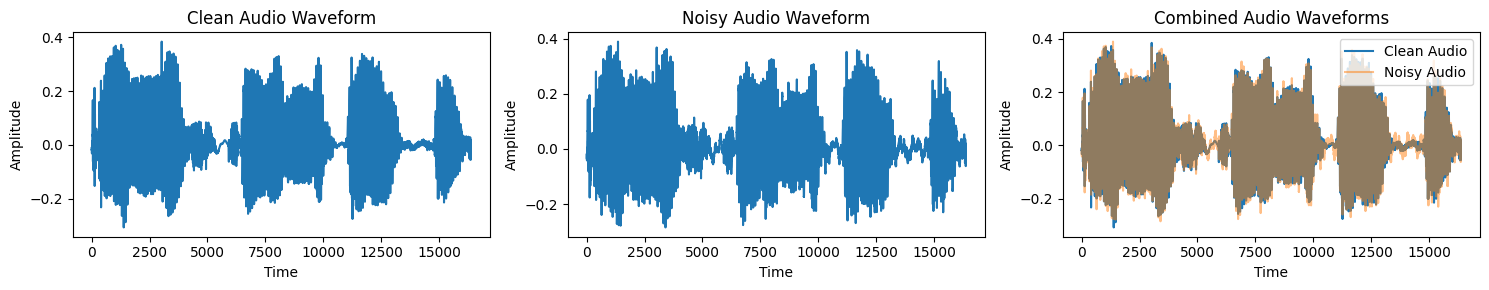

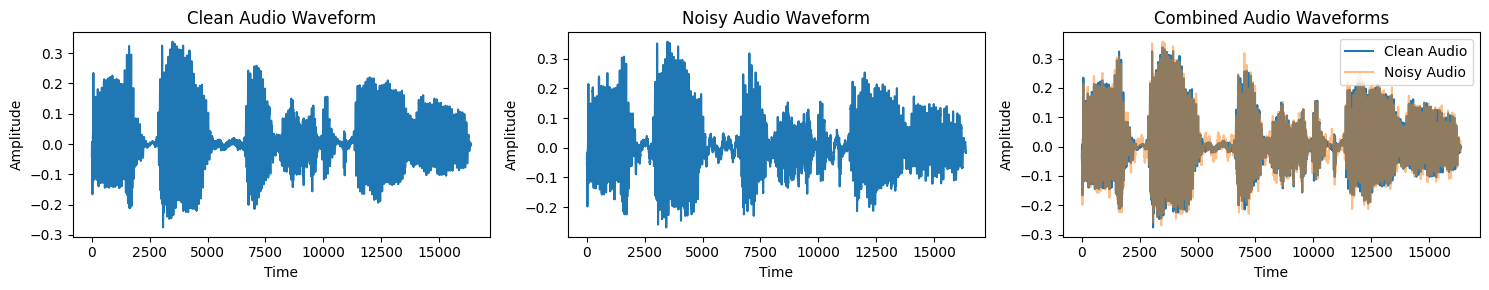

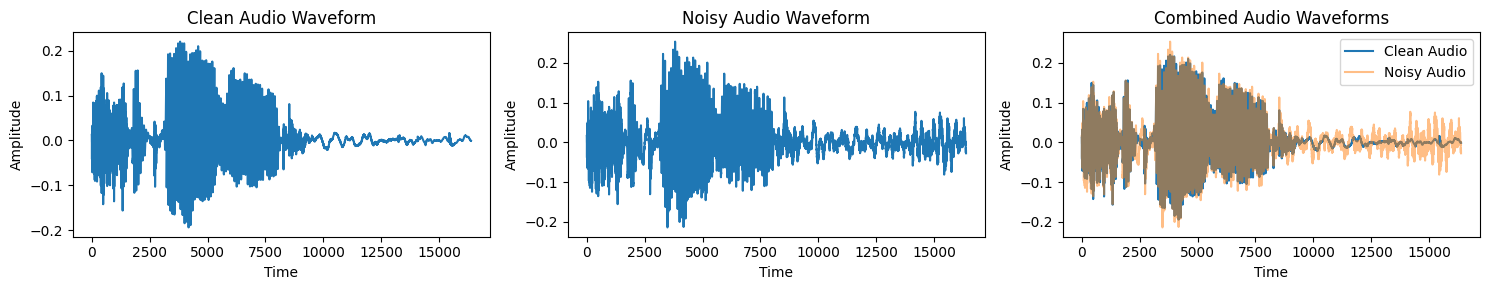

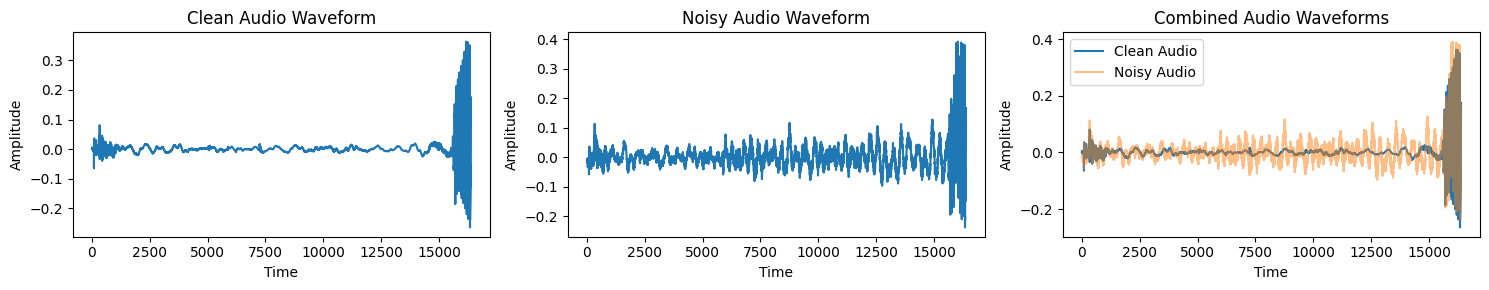

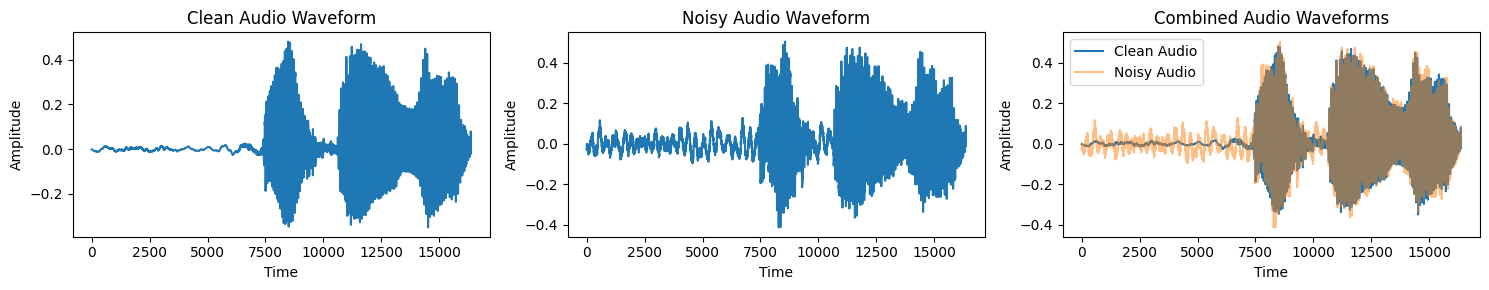

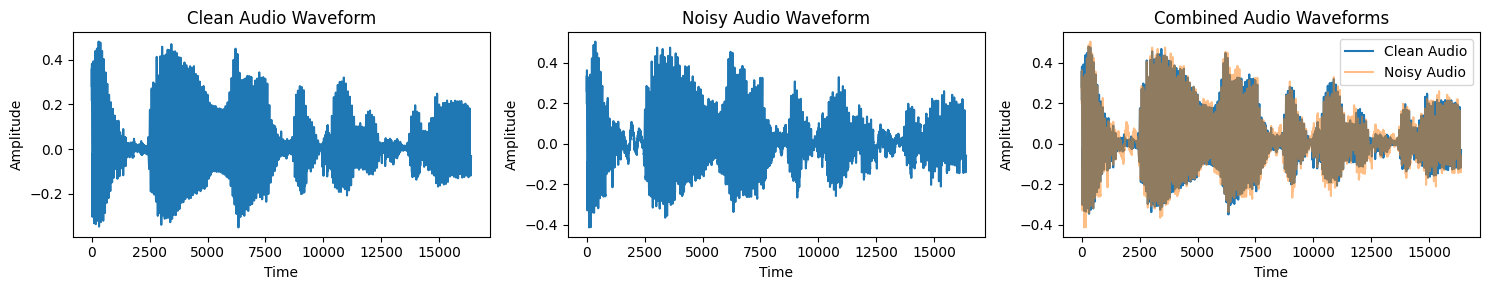

In [8]:
sample_size = 6
sample_index = np.random.randint(0, len(datamodule.train_dataset)-sample_size)
for i in range(sample_index,sample_index+sample_size):
    plot_waveforms(*datamodule.train_dataset[i])

# Net

In [9]:
from src.module.segan_generator import SEGAN_Generator
import torch
generator = SEGAN_Generator()

out = generator(torch.normal(mean=torch.zeros(1,1, 16384),std=torch.ones(1,1, 16384)))

In [12]:
from src.module.segan_discriminator import SEGAN_Discriminator

X = torch.cat((ref_batch_X,ref_batch_X),dim=1)
discriminator = SEGAN_Discriminator(X)

In [14]:
out = discriminator(X)